# L2 Projection

In the context of mathematical analysis and numerical methods, an L2 projection refers to a technique for approximating a given function or data by finding the best possible approximation within the space of square-integrable functions. The term "L2" refers to the concept of the L2 norm, which is a measure of the size of a function.

The L2 projection seeks to minimize the L2 norm of the error between the given function and its approximation. This is achieved by finding the closest function in the L2 space, where the closeness is measured in terms of the L2 norm.

In simpler terms, the L2 projection is a mathematical method used to find the closest match or representation of a function in a certain mathematical space, where "closeness" is defined by a specific mathematical criterion related to the L2 norm. This technique is commonly employed in areas such as functional analysis, finite element methods, and numerical analysis.

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D

Problem 1. **$L^2$ projection in 1D for higher order polynomials**

Consider the interval $(0,1)$ partitioned into $N$ intervals of length $h$. Use $N=10$ and $N=20$. Write a code that computes the $L^2$ projection of f for different polynomial degrees $k=2,3,4$ for the following three functions:

$$f_1(x) = x^2 + 1$$

$$f_2(x) = −x^3 + x^2$$

$$f_3(x) = \sin(\frac{π}{3}x)$$

For a given function and a given $N$, plot on the same figure the exact function and the three projections. Compute the $L^2$ error for each exact function and each projection.

This means that for each function $f_i$, you need to produce two figures (one for $N=10$ and one for $N=20$) and you need to compute six errors (three for $N=10$ and three for $N=20$).

L2 error for Function 1, N=10, k=2 is 4.1923424287647667e-13


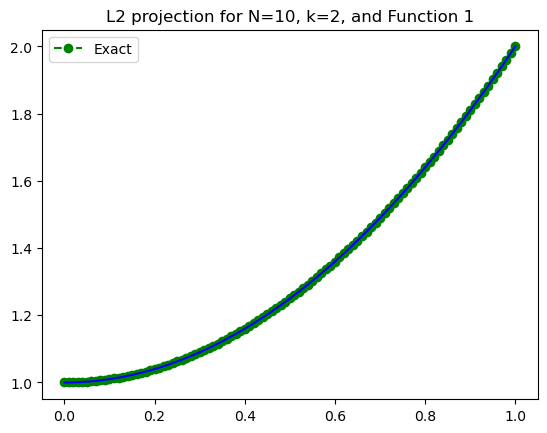

L2 error for Function 1, N=10, k=3 is 3.19886825482623e-11


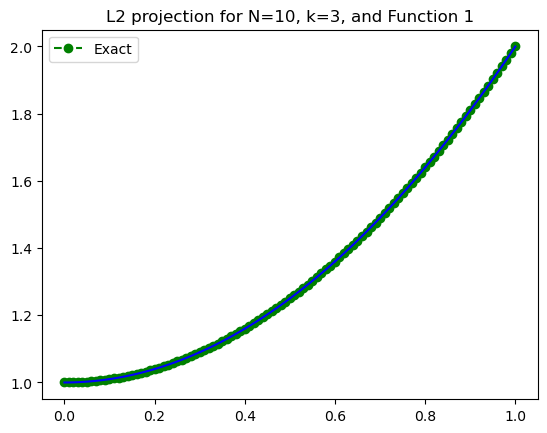

L2 error for Function 1, N=10, k=4 is 1.3594422534682814e-09


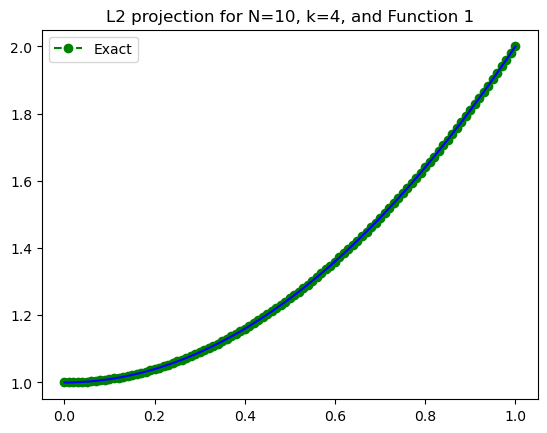

L2 error for Function 2, N=10, k=2 is 1.889822365045479e-05


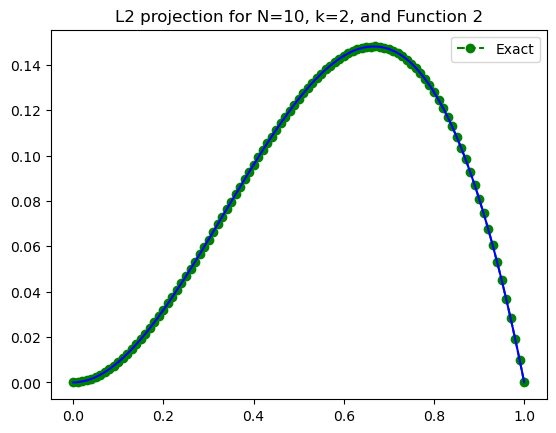

L2 error for Function 2, N=10, k=3 is 8.77406547090715e-12


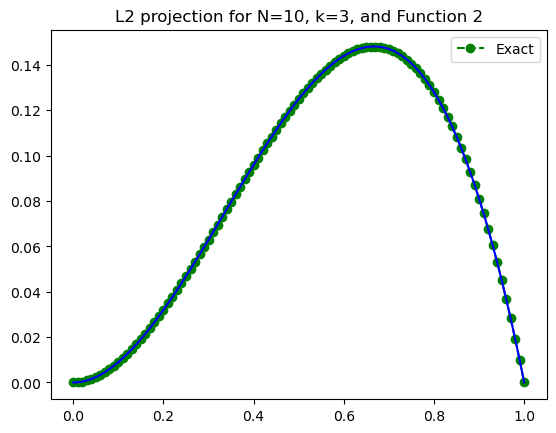

L2 error for Function 2, N=10, k=4 is 6.303101482750875e-10


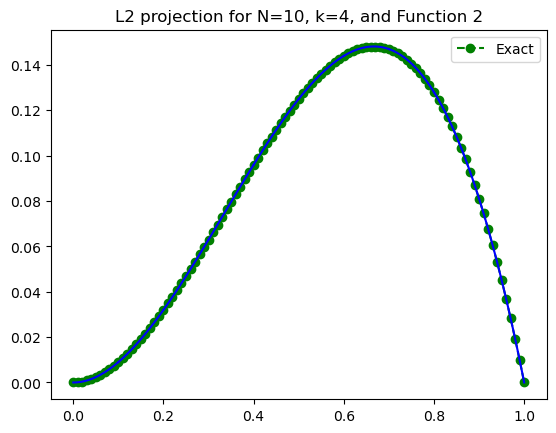

L2 error for Function 3, N=10, k=2 is 3.0411789136474854e-06


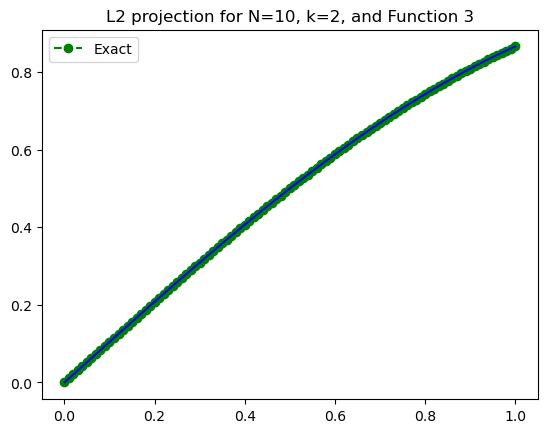

L2 error for Function 3, N=10, k=3 is 1.291172514709296e-08


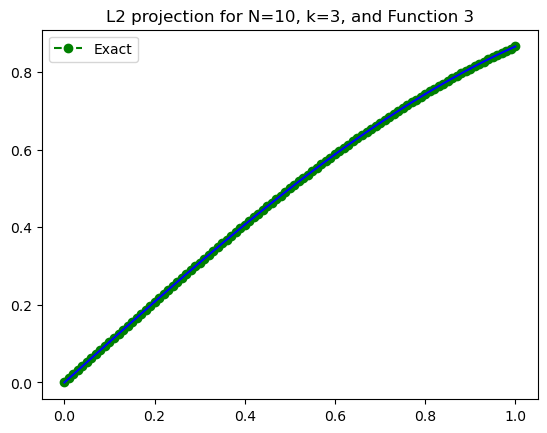

L2 error for Function 3, N=10, k=4 is 4.56588889404366e-10


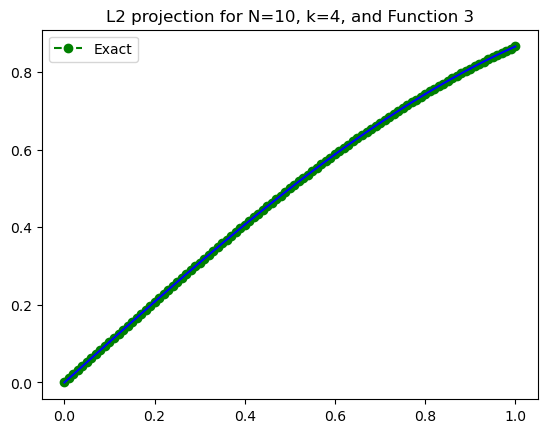

L2 error for Function 1, N=20, k=2 is 9.70203198867028e-13


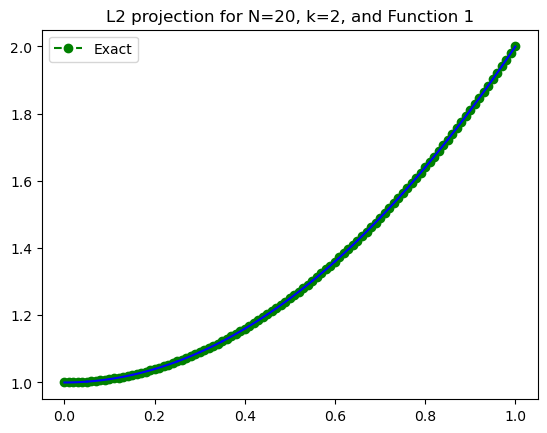

L2 error for Function 1, N=20, k=3 is 1.7314849710748615e-10


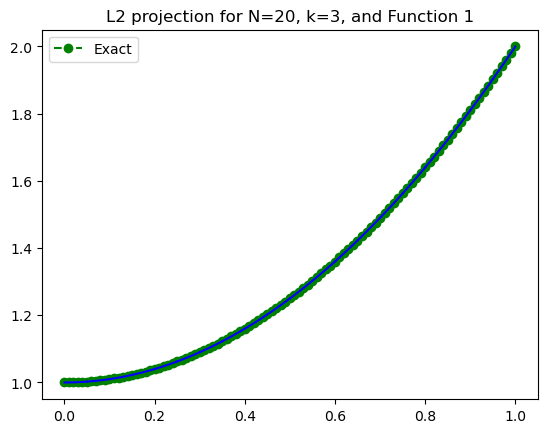

L2 error for Function 1, N=20, k=4 is 1.709989334894931e-08


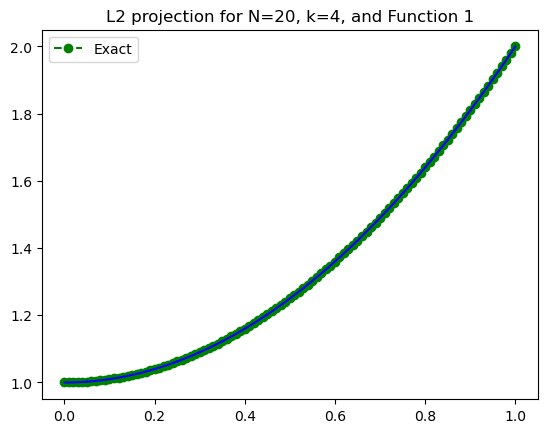

L2 error for Function 2, N=20, k=2 is 2.3622779563035985e-06


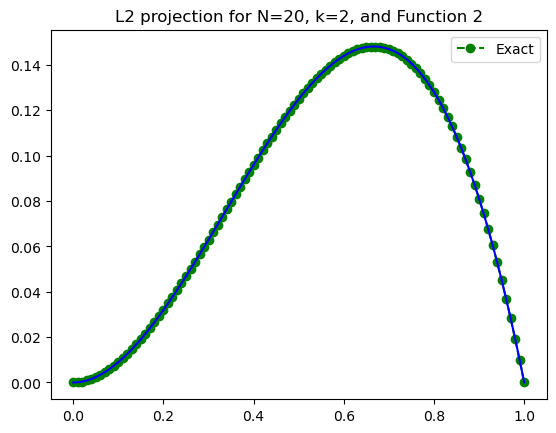

L2 error for Function 2, N=20, k=3 is 8.457580166115313e-11


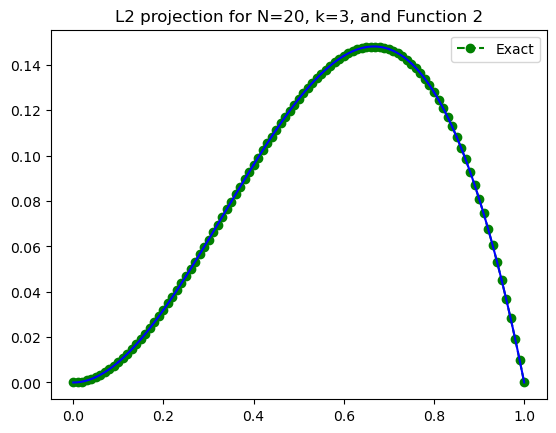

L2 error for Function 2, N=20, k=4 is 4.9755097581894275e-09


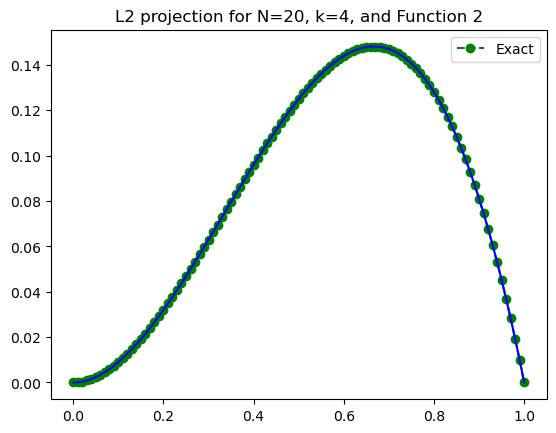

L2 error for Function 3, N=20, k=2 is 3.8011190681122067e-07


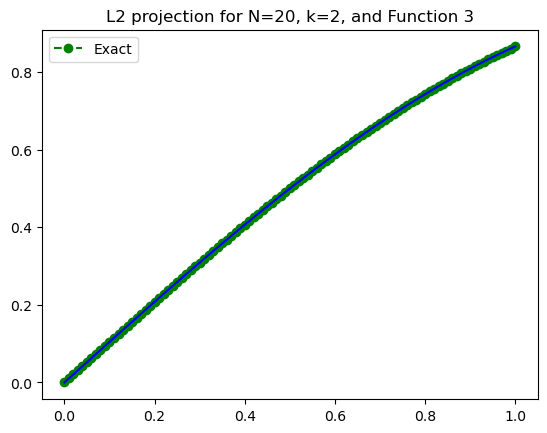

L2 error for Function 3, N=20, k=3 is 8.161766109055579e-10


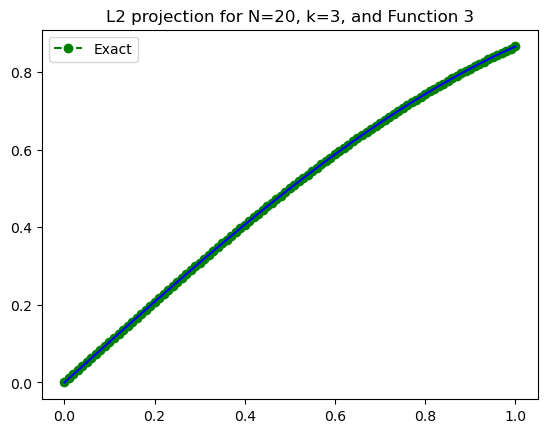

L2 error for Function 3, N=20, k=4 is 1.0213931196900527e-08


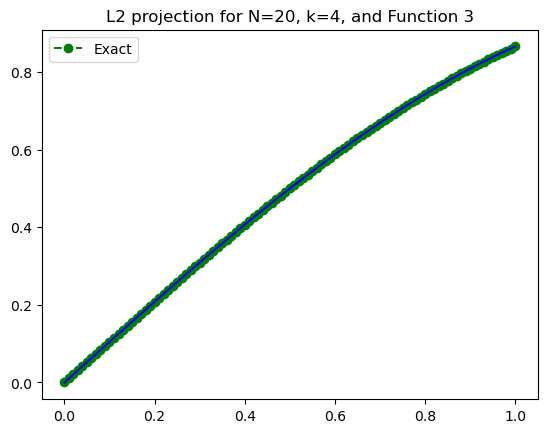

In [48]:
# Define the weight and node values for numerical Gauss-Legendre quadrature 1D
wg = np.array([0.129484966168863, 0.279705391489277, 0.381830050505119,
               0.417959183673469, 0.381830050505119, 0.279705391489277,
               0.129484966168863])  #weight

xg = np.array([-0.949107912342759, -0.741531185599394, -0.405845151377397,
               0.0, 0.405845151377397, 0.741531185599394, 0.949107912342759])  #node

# 3 functions to be projected from problem
def myfct(x, function_number):
    if function_number == 1:
        return x**2 + 1
    elif function_number == 2:
        return -(x**3) + x**2
    elif function_number == 3:
        return math.sin(math.pi / 3 * x)

# Function to compute L2 projection for a given function and N
def compute_L2_projection(N, k, function_number):
    hval = 1 / N
    coeff_proj = np.zeros((N, k + 1))

    for iel in range(N):
        Aloc = np.zeros((k + 1, k + 1))

        for i in range(7):
            xval = (hval / 2) * (xg[i] + 1) + (iel * hval)
            for j in range(k + 1):
                for l in range(k + 1):
                    Aloc[j, l] += wg[i] * (xval ** (j + l))

        Aloc = (hval / 2) * Aloc
        bloc = np.zeros(k + 1)

        for i in range(7):
            xval = (hval / 2) * (xg[i] + 1) + (iel * hval)
            f_x = myfct(xval, function_number)
            for j in range(k + 1):
                bloc[j] += wg[i] * (xval ** j) * f_x

        bloc = (hval / 2) * bloc
        coeff_proj[iel, :] = np.linalg.solve(Aloc, bloc)

    L2err = 0

    for iel in range(N):
        for i in range(7):
            xval = (hval / 2) * (xg[i] + 1) + (iel * hval)
            projfct = sum(coeff_proj[iel, j] * (xval ** j) for j in range(k + 1))
            L2err += wg[i] * (myfct(xval, function_number) - projfct) ** 2

    L2err = (hval / 2) * L2err
    L2err = math.sqrt(L2err)

    return coeff_proj, L2err

# Plot the function and its projection
def plot_function_and_projection(N, k, function_number):
    Nplot = 100
    hplotval = 1 / Nplot
    tval = np.linspace(0, 1, Nplot + 1)
    fexact = [myfct(t, function_number) for t in tval]

    plt.figure(1)
    plt.plot(tval, fexact, 'go--', label='Exact')

    for iel in range(N):
        zval = np.linspace(iel / N, (iel + 1) / N, Nplot)
        fproj = [sum(coeff_proj[iel, j] * (z ** j) for j in range(k + 1)) for z in zval]
        plt.plot(zval, fproj, 'b-')

    plt.title(f"L2 projection for N={N}, k={k}, and Function {function_number}")
    plt.legend()
    plt.show()

# Loop L2 projection plots for each case
for N in [10, 20]:
    for function_number in [1, 2, 3]:
        for k in [2, 3, 4]:
            coeff_proj, L2err = compute_L2_projection(N, k, function_number)
            print(f'L2 error for Function {function_number}, N={N}, k={k} is {L2err}')

            plot_function_and_projection(N, k, function_number)


Problem 2. **$L^2$ projection in 2D for one triangle and higher order polynomials**

Consider the triangle $K$ with vertices $P_1(−2, 1), P_2(0, 0), P_3(−1, 3)$. Compute the $L^2$ projection of $f$ for $k=2,3,4$ and for the following functions:

$$f_1(x,y) = 1$$

$$f_2(x,y) = e^{-x-y}$$

$$f_3(x,y) = \sin(\frac{π}{3}x) \cos(\frac{π}{5}y) (x^2+y^2+5)^{\frac{1}{2}}$$

Compute the $L^2$ error between the exact function and its projection for each polynomial degree. Plot on the same figure the exact function and its projection. For this, partition the triangle into $16$ small
triangles, each edge is divided into $4$ intervals of equal length (this will be discussed during the lecture on Otober 19th).

The L2 error for the function is 0.000000
The L2 error for the function is 0.219965
The L2 error for the function is 0.456455


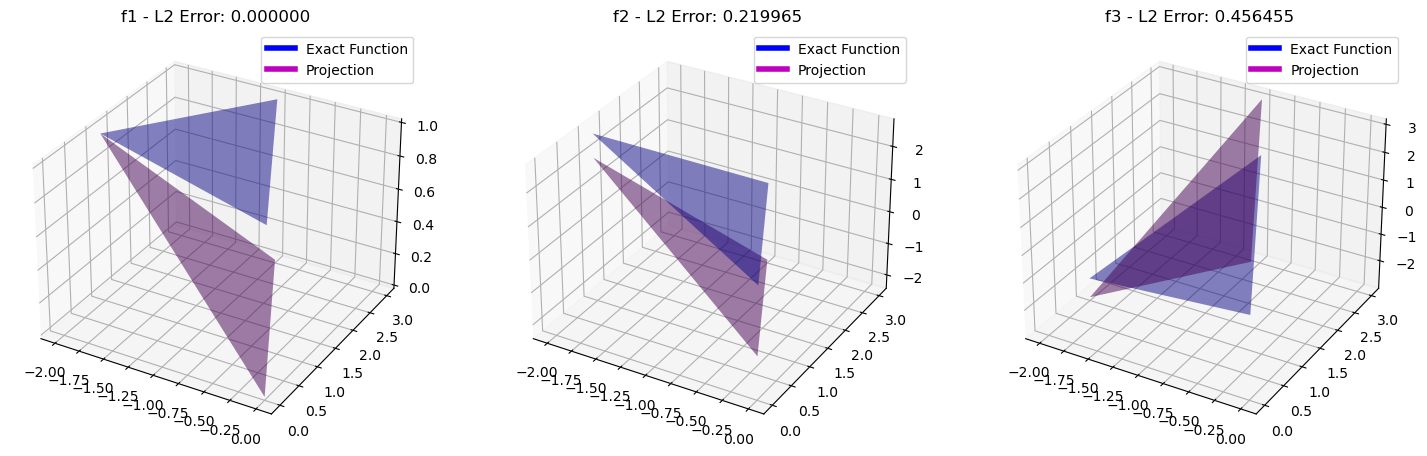

In [49]:
# Define the triangle vertices
locnodes = np.array([[-2, 1], [0, 0], [-1, 3]])

# Define the weights and nodes for Gaussian quadrature
wg = np.array([0.1125, 0.0629695902724, 
               0.0629695902724, 0.0629695902724,
               0.0661970763942, 0.0661970763942, 
               0.0661970763942])

xg = np.array([[0.3333333333, 0.3333333333],
              [0.101286507323, 0.101286507323],
              [0.797426985353, 0.101286507323],
              [0.101286507323, 0.797426985353],
              [0.470142064105, 0.470142064105],
              [0.059715871789, 0.470142064105],
              [0.470142064105, 0.059715871789]])

# Define the basis functions
def basfct(iloc, sval, tval):
    if iloc == 0:
        fval = 1.0
    elif iloc == 1:
        fval = sval
    elif iloc == 2:
        fval = tval
    return fval

# Define the exact functions
def f1(x, y):
    return 1.0

def f2(x, y):
    return math.exp(-x - y)

def f3(x, y):
    return math.sin((math.pi / 3) * x) * math.cos((math.pi / 5) * y) * (x**2 + y**2 + 5)**0.5

# Initialize matrices and vectors
Amat = np.zeros((3, 3))
brhs = np.zeros(3)

# Compute determinant of Jacobian
Dval = (locnodes[1, 0] - locnodes[0, 0]) * (locnodes[2, 1] - locnodes[0, 1]) - \
        (locnodes[1, 1] - locnodes[0, 1]) * (locnodes[2, 0] - locnodes[0, 0])

# Lists to store coefficients and L2 errors for all functions
coefficients = []
L2errors = []

# Loop over functions and calculate L2 projection for each
for func in [f1, f2, f3]:
    Amat.fill(0)
    brhs.fill(0)

    # Loop over Gaussian quadrature points
    for i in range(7):
        xval = locnodes[0, 0] + (locnodes[1, 0] - locnodes[0, 0]) * xg[i, 0] + \
                (locnodes[2, 0] - locnodes[0, 0]) * xg[i, 1]
        yval = locnodes[0, 1] + (locnodes[1, 1] - locnodes[0, 1]) * xg[i, 0] + \
                (locnodes[2, 1] - locnodes[0, 1]) * xg[i, 1]

        # Compute 3x3 matrix
        for irow in range(3):
            for icol in range(3):
                Amat[irow, icol] += Dval * wg[i] * basfct(irow, xg[i, 0], xg[i, 1]) * basfct(icol, xg[i, 0], xg[i, 1])

        # Compute 3x1 rhs vector
        for irow in range(3):
            brhs[irow] += Dval * wg[i] * basfct(irow, xg[i, 0], xg[i, 1]) * func(xval, yval)

    # Solve for projection coefficients
    coeff = np.linalg.solve(Amat, brhs)
    coefficients.append(coeff)

    # Compute L2 error
    L2err = 0.0
    for i in range(7):
        xval = locnodes[0, 0] + (locnodes[1, 0] - locnodes[0, 0]) * xg[i, 0] + \
                (locnodes[2, 0] - locnodes[0, 0]) * xg[i, 1]
        yval = locnodes[0, 1] + (locnodes[1, 1] - locnodes[0, 1]) * xg[i, 0] + \
                (locnodes[2, 1] - locnodes[0, 1]) * xg[i, 1]

        projval = coeff[0] + coeff[1] * xg[i, 0] + coeff[2] * xg[i, 1]
        L2err += Dval * wg[i] * (func(xval, yval) - projval)**2

    L2err = np.sqrt(L2err)
    L2errors.append(L2err)
    print(f"The L2 error for the function is {L2err:.6f}")

# Create a custom legend using Line2D objects
legend_elements = [Line2D([0], [0], color='b', lw=4, label='Exact Function'),
                   Line2D([0], [0], color='m', lw=4, label='Projection')]

# Plot the results for all functions
fig = plt.figure(figsize=(18, 6))

# Plot the exact and projected functions for f1
ax = fig.add_subplot(131, projection='3d')
x, y = locnodes.T
values_proj = [coefficients[0][0], coefficients[0][1], coefficients[0][2]]
values_exact = [f1(x[0], y[0]), f1(x[1], y[1]), f1(x[2], y[2])]
ax.plot_trisurf(x, y, values_proj, cmap='viridis', alpha=0.5, label='Projection for f1')
ax.plot_trisurf(x, y, values_exact, cmap='plasma', alpha=0.5, label='Exact Function for f1')
ax.set_title(f'f1 - L2 Error: {L2errors[0]:.6f}')

# Plot the exact and projected functions for f2
ax = fig.add_subplot(132, projection='3d')
x, y = locnodes.T
values_proj = [coefficients[1][0], coefficients[1][1], coefficients[1][2]]
values_exact = [f2(x[0], y[0]), f2(x[1], y[1]), f2(x[2], y[2])]
ax.plot_trisurf(x, y, values_proj, cmap='viridis', alpha=0.5, label='Projection for f2')
ax.plot_trisurf(x, y, values_exact, cmap='plasma', alpha=0.5, label='Exact Function for f2')
ax.set_title(f'f2 - L2 Error: {L2errors[1]:.6f}')

# Plot the exact and projected functions for f3
ax = fig.add_subplot(133, projection='3d')
x, y = locnodes.T
values_proj = [coefficients[2][0], coefficients[2][1], coefficients[2][2]]
values_exact = [f3(x[0], y[0]), f3(x[1], y[1]), f3(x[2], y[2])]
ax.plot_trisurf(x, y, values_proj, cmap='viridis', alpha=0.5, label='Projection for f3')
ax.plot_trisurf(x, y, values_exact, cmap='plasma', alpha=0.5, label='Exact Function for f3')
ax.set_title(f'f3 - L2 Error: {L2errors[2]:.6f}')

for ax in fig.get_axes():
    ax.legend(handles=legend_elements, loc='best')

plt.show()